Testing loading the model

In [1]:
import torch
from models.dsgg_single_sgdet import build, CDNDSGG
from models.backbone import build_backbone
from models import build_model
import sys
import subprocess
import datasets.transforms_single as T
from PIL import Image
from datasets import build_dataset
import torchvision

In [2]:
class Args:
    lr = 1e-4
    lr_backbone = 1e-5
    batch_size = 2
    weight_decay = 1e-4
    epochs = 90
    lr_drop = 60
    clip_max_norm = 0.1
    backbone = 'resnet50'
    dilation = False
    position_embedding = 'sine'
    enc_layers = 6
    dec_layers_hopd = 3
    dec_layers_interaction = 3
    dim_feedforward = 2048
    hidden_dim = 256
    dropout = 0.1
    nheads = 8
    num_queries = 100
    pre_norm = False
    masks = False
    num_obj_classes = 36
    num_verb_classes = 117
    pretrained = 'exps/params/sgdet/spatial/checkpoint_22.pth'
    subject_category_id = 1
    verb_loss_type = 'focal'
    aux_loss = True
    use_matching = False
    set_cost_class = 1.0
    set_cost_bbox = 2.5 
    set_cost_giou = 1.0
    set_cost_obj_class = 1.0
    set_cost_verb_class = 1.0
    set_cost_matching = 1.0
    set_cost_rel_class = 1.0
    mask_loss_coef = 1.0
    dice_loss_coef = 1.0
    bbox_loss_coef = 2.5 
    giou_loss_coef = 1.0
    obj_loss_coef = 1.0
    verb_loss_coef = 2.0
    rel_loss_coef = 2.0
    alpha = 0.5
    matching_loss_coef = 1.0
    eos_coef = 0.1
    dataset_file = 'ag_single'
    ag_path = './data/action-genome'
    output_dir = './output'
    device = 'cuda'
    seed = 42
    resume = ''
    start_epoch = 0
    eval = False
    num_workers = 4
    distributed = False
    world_size = 1
    dist_url = 'env://'
    freeze_mode = 0
    use_nms_filter = True
    thres_nms = 0.9 
    nms_alpha = 1.0
    nms_beta = 1.0
    json_file = 'results.json'
    cache_mode = False
    num_attn_classes = 3
    num_spatial_classes = 6
    num_contacting_classes = 17
    dsgg_task = 'sgdet'
    interval1 = 4
    interval2 = 4
    num_ref_frames = 2
    dec_layers_temporal = 1
    seq_sort = False
    fuse_semantic_pos = False
    temporal_feature_encoder = False
    instance_temporal_interaction = False
    relation_temporal_interaction = False
    query_temporal_interaction = False
    temporal_embed_head = False
    temporal_decoder_init = False
    one_dec = False
    use_roi = False
    one_temp = False
    no_update_pair = False
    semantic_head = False
    use_matched_query = False
    aux_learnable_query = False
    method2 = False
    ft_baseline = False
    obj_reweight = False
    rel_reweight = False
    use_static_weights = False
    queue_size = 4704.0
    p_obj = 0.7
    p_rel = 0.7

In [3]:
args = Args()
device = torch.device(args.device)

In [4]:
model, criterion, postprocessors = build_model(args)
model.to(device)

/home/lasige/.conda/envs/g_ribeiro/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lasige/.conda/envs/g_ribeiro/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CDNDSGG(
  (transformer): CDN(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-2): 3 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_fea

In [5]:
checkpoint = torch.load(args.pretrained, map_location='cpu')
model.load_state_dict(checkpoint['model'], strict=False)

/tmp/ipykernel_2644/3446825218.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(args.pretrained, map_location='cpu')


_IncompatibleKeys(missing_keys=[], unexpected_keys=['transformer.decoder.layers.3.self_attn.in_proj_weight', 'transformer.decoder.layers.3.self_attn.in_proj_bias', 'transformer.decoder.layers.3.self_attn.out_proj.weight', 'transformer.decoder.layers.3.self_attn.out_proj.bias', 'transformer.decoder.layers.3.multihead_attn.in_proj_weight', 'transformer.decoder.layers.3.multihead_attn.in_proj_bias', 'transformer.decoder.layers.3.multihead_attn.out_proj.weight', 'transformer.decoder.layers.3.multihead_attn.out_proj.bias', 'transformer.decoder.layers.3.linear1.weight', 'transformer.decoder.layers.3.linear1.bias', 'transformer.decoder.layers.3.linear2.weight', 'transformer.decoder.layers.3.linear2.bias', 'transformer.decoder.layers.3.norm1.weight', 'transformer.decoder.layers.3.norm1.bias', 'transformer.decoder.layers.3.norm2.weight', 'transformer.decoder.layers.3.norm2.bias', 'transformer.decoder.layers.3.norm3.weight', 'transformer.decoder.layers.3.norm3.bias', 'transformer.decoder.layers.

In [6]:
normalize = T.Compose([
        T.ToTensor(),
        T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # T.Normalize([0.4196, 0.3736, 0.3451], [0.2859, 0.2810, 0.2784])
    ])

final = T.Compose([
            T.RandomResize([600], max_size=1000),
            normalize,
        ])

In [7]:
dataset = build_dataset('val',args)

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


In [8]:
OBJ_CLASSES = ("background", "person", "bag", "bed", "blanket", "book", "box", "broom", "chair", 
           "closet/cabinet", "clothes", "cup/glass/bottle", "dish", "door", 
           "doorknob", "doorway", "floor", "food", "groceries", "laptop", 
           "light", "medicine", "mirror", "paper/notebook", "phone/camera", 
           "picture", "pillow", "refrigerator", "sandwich", "shelf", "shoe", "sofa/couch",
           "table", "television", "towel", "vacuum", "window")

PREDICATE_CLASSES = ("looking at", "not looking at", "unsure", "above", "beneath", "in front of", 
                     "behind", "on the side of", "in", "carrying", "covered by", "drinking from", 
                     "eating", "have it on the back", "holding", "leaning on", "lying on", "not contacting",
                     "other relationship", "sitting on", "standing on", "touching", "twisting", "wearing",
                     "wiping", "writing on")

SPATIAL_LABELS = ("in front of", "behind", "on the side of", "above", "beneath", "in")

CONTACTING_LABELS = ("carrying", "drinking from", "have it on the back", "leaning on", "not contacting", "standing on",
                    "twisting", "wiping", "covered by", "eating", "holding", "lying on", "sitting on", "touching", 
                    "wearing","writing on")

CONTACTING_LABELS_2 = ("carrying",
"covered by",
"drinking from",
"eating",
"have it on the back",
"holding",
"leaning on",
"lying on",
"not contacting",
"sitting on",
"standing on",
"touching",
"twisting",
"wearing",
"wiping",
"writing on")

ATTENTION_LABELS = ("looking at", "not looking at", "unsure")

In [320]:
data_nr = 1
dataset[data_nr][1]

{'orig_size': tensor([480, 270]),
 'size': tensor([999, 562]),
 'boxes': tensor([[0.7682, 0.5055, 0.3599, 0.4644],
         [0.8856, 0.6130, 0.2272, 0.2272]]),
 'labels': tensor([ 1, 32]),
 'iscrowd': tensor([False, False]),
 'area': tensor([93819.5547, 28983.1660]),
 'obj_labels': tensor([32]),
 'sub_boxes': tensor([[0.7682, 0.5055, 0.3599, 0.4644]]),
 'obj_boxes': tensor([[0.8856, 0.6130, 0.2272, 0.2272]]),
 'attn_labels': tensor([[0., 0., 1.]]),
 'spatial_labels': tensor([[0., 0., 1., 0., 0., 0.]]),
 'contacting_labels': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 'matching_labels': tensor([1])}

In [311]:
def get_indices(element, lst):
    indices = []
    for i in range(len(lst)):
        if lst[i] == element:
            indices.append(i)
    return indices

In [321]:
# Get meaning from image
objects = []
object_index = 0
image_info = dataset[data_nr][1]
for label in image_info['labels'][1:]:
    objects.append({OBJ_CLASSES[label]: object_index})
    object_index += 1

print(objects)

for obj in objects:
    print(f"For {list(obj.keys())[0]}:")

    att_obj = image_info['attn_labels'][list(obj.values())[0]].tolist()
    print(f"    Attention --> {ATTENTION_LABELS[att_obj.index(1.0)]}")

    spt_obj = image_info['spatial_labels'][list(obj.values())[0]].tolist()
    spt_indices = get_indices(1.0,spt_obj)
    for ind in spt_indices:
        print(f"    Spatial --> {SPATIAL_LABELS[ind]}")

    contact = image_info['contacting_labels'][list(obj.values())[0]].tolist()
    cnt_indices = get_indices(1.0,contact)
    for ind in cnt_indices:
        print(f"    Contacting --> {CONTACTING_LABELS_2[ind]}")


[{'table': 0}]
For table:
    Attention --> unsure
    Spatial --> on the side of
    Contacting --> not contacting


In [322]:
image_tensor = dataset[data_nr][0]
bbox_tensor = dataset[data_nr][1]['boxes']
sub_boxes = dataset[data_nr][1]['sub_boxes']
print(bbox_tensor)
labels = dataset[data_nr][1]['labels']
print(f'Labels: {labels}')
print(f'Subboxes: {sub_boxes}')

tensor([[0.7682, 0.5055, 0.3599, 0.4644],
        [0.8856, 0.6130, 0.2272, 0.2272]])
Labels: tensor([ 1, 32])
Subboxes: tensor([[0.7682, 0.5055, 0.3599, 0.4644]])


In [116]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

def show_image_boxes(image_tensor, boxes, box_labels = [], obj_classes = OBJ_CLASSES):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])

    # Denormalize the image tensor
    image_tensor = image_tensor * std[:, None, None] + mean[:, None, None]

    # Get image dimensions (height and width)
    height, width = image_tensor.shape[1], image_tensor.shape[2]

    # Convert tensor to NumPy for visualization
    image_np = image_tensor.permute(1, 2, 0).clamp(0, 1).numpy()

    # Create a figure and axis
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image_np)

    # Loop over each box and label
    for box, label in zip(boxes, box_labels):
        x_center, y_center, w, h = box
        x_center = x_center * width
        y_center = y_center * height
        w = w * width
        h = h * height

        # Calculate the top-left corner
        x1 = x_center - w / 2
        y1 = y_center - h / 2

        # Draw the bounding box
        rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

        # Add the label text above the box
        if box_labels != []:
            class_name = obj_classes[label]  # Get the class name from the index
            ax.text(
                x1, y1 - 5, class_name, 
                fontsize=8, color='yellow', 
                bbox=dict(facecolor='black', alpha=0.5, edgecolor='none')
            )

    # Remove axes for better visualization
    plt.axis('off')
    plt.show()


In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch

def show_image_boxes_without_labels(image_tensor, boxes):
    mean = torch.tensor([0.485, 0.456, 0.406])
    std = torch.tensor([0.229, 0.224, 0.225])

    # Denormalize the image tensor
    image_tensor = image_tensor * std[:, None, None] + mean[:, None, None]

    # Get image dimensions (height and width)
    height, width = image_tensor.shape[1], image_tensor.shape[2]

    # Convert tensor to NumPy for visualization
    image_np = image_tensor.permute(1, 2, 0).clamp(0, 1).numpy()

    # Create a figure and axis
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image_np)

    # Loop over each box and label
    for box in boxes:
        x_center, y_center, w, h = box
        x_center = x_center * width
        y_center = y_center * height
        w = w * width
        h = h * height

        # Calculate the top-left corner
        x1 = x_center - w / 2
        y1 = y_center - h / 2

        # Draw the bounding box
        rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)


    # Remove axes for better visualization
    plt.axis('off')
    plt.show()

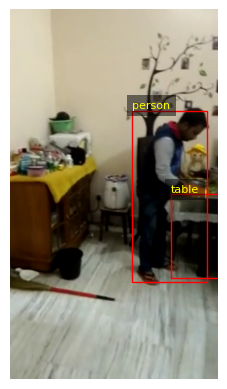

In [323]:
show_image_boxes(image_tensor,bbox_tensor,labels,OBJ_CLASSES)

In [16]:
from util.misc import nested_tensor_from_tensor_list 

def run_inference(image_tensor, model, device):
    model.eval()
    with torch.no_grad():
        nested_tensor = nested_tensor_from_tensor_list([image_tensor])
        outputs = model(nested_tensor)
    return outputs

In [324]:
model.to('cpu')
output = run_inference(dataset[data_nr][0],model,device)

In [288]:
def filter_keys(data, list_index):
    
    filtered_data = {}

    for key, value in data.items():
        if key == 'aux_outputs':
            continue

        filtered_data[key] = value[:,list_index]

    return filtered_data

def main_filter(output):
    obj_logits = output['pred_obj_logits'][0]
    filtered_obj_indexes = []

    for i in range(len(obj_logits)):
        pred = obj_logits[i]
        pred_lst = pred.tolist()[:-1]

        # Geral
        if max(pred_lst) > 5:
            filtered_obj_indexes.append(i)
        
        # pessoas

    filtered_obj = filter_keys(output, filtered_obj_indexes)
    return filtered_obj

In [325]:
filtered = main_filter(output)
pred_obj_logits = filtered['pred_obj_logits']
pred_boxes = filtered['pred_obj_boxes'][0]

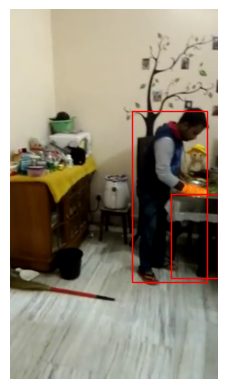

In [326]:
show_image_boxes_without_labels(image_tensor,dataset[data_nr][1]['boxes'])#pred_boxes

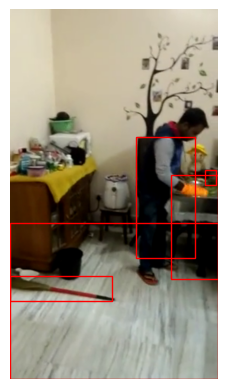

In [327]:
show_image_boxes_without_labels(image_tensor,pred_boxes)

# Get info:
Let's do it only for the first object:

In [332]:
import json

def make_info_json(filtered):
    nr_bboxes = len(filtered['pred_obj_boxes'][0])
    info = {}
    for i in range(nr_bboxes):
        object = {}
        values_lst = filtered['pred_obj_logits'][0][i].tolist()
        max_obj_value = max(values_lst[:-1])
        max_obj_index = values_lst.index(max_obj_value)

        spatial_values = filtered['pred_spatial_logits'][0][i].tolist()
        max_spatial_value = max(spatial_values[:-1])
        max_spatial_index = spatial_values.index(max_spatial_value)

        object['Spatial'] = SPATIAL_LABELS[max_spatial_index]

        contact_values = filtered['pred_contacting_logits'][0][i].tolist()
        max_contact_value = max(contact_values[:-1])
        max_contact_index = contact_values.index(max_contact_value)

        object['Contact'] = CONTACTING_LABELS_2[max_contact_index]

        attention_values = filtered['pred_attn_logits'][0][i].tolist()
        max_attention_value = max(attention_values[:-1])
        max_attention_index = attention_values.index(max_attention_value)

        object['Attention'] = ATTENTION_LABELS[max_attention_index]
        info[OBJ_CLASSES[max_obj_index]] = object
    
    json_object = json.dumps(info,indent=4)
    return json_object


In [334]:
print(make_info_json(filtered))

{
    "cup/glass/bottle": {
        "Spatial": "on the side of",
        "Contact": "holding",
        "Attention": "looking at"
    },
    "broom": {
        "Spatial": "beneath",
        "Contact": "not contacting",
        "Attention": "not looking at"
    },
    "chair": {
        "Spatial": "behind",
        "Contact": "standing on",
        "Attention": "not looking at"
    },
    "floor": {
        "Spatial": "behind",
        "Contact": "touching",
        "Attention": "not looking at"
    },
    "table": {
        "Spatial": "on the side of",
        "Contact": "not contacting",
        "Attention": "not looking at"
    }
}
